## Data Cleaning and EDA Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

### Importing the Data

In [2]:
df = pd.read_csv("Job_Frauds.csv")
df.head()

,Job Title,Job Location,Department,Range_of_Salary,Profile,Job_Description,Requirements,Job_Benefits,Telecomunication,Comnpany_Logo,Type_of_Employment,Experience,Qualification,Type_of_Industry,Operations,Fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df1 = df.copy()

### Shape of the dataset

In [4]:
df.shape

(17880, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           17880 non-null  object
 1   Job Location        17534 non-null  object
 2   Department          6333 non-null   object
 3   Range_of_Salary     2868 non-null   object
 4   Profile             14572 non-null  object
 5   Job_Description     17879 non-null  object
 6   Requirements        15185 non-null  object
 7   Job_Benefits        10670 non-null  object
 8   Telecomunication    17880 non-null  int64 
 9   Comnpany_Logo       17880 non-null  int64 
 10  Type_of_Employment  14409 non-null  object
 11  Experience          10830 non-null  object
 12  Qualification       9775 non-null   object
 13  Type_of_Industry    12977 non-null  object
 14  Operations          11425 non-null  object
 15  Fraudulent          17880 non-null  int64 
dtypes: int64(3), object(13

Since the number of null value of the Range of Salary is very high compared to the non null value, the column will not be useful to us, hence it can be dropped

### Checking for null values

In [6]:
df.isna().sum()

Job Title                 0
Job Location            346
Department            11547
Range_of_Salary       15012
Profile                3308
Job_Description           1
Requirements           2695
Job_Benefits           7210
Telecomunication          0
Comnpany_Logo             0
Type_of_Employment     3471
Experience             7050
Qualification          8105
Type_of_Industry       4903
Operations             6455
Fraudulent                0
dtype: int64

### Create Table for Text Columns and fill the Null Values in the text columns with spaces

In [7]:
df_Text = df[["Job Title", "Profile", "Job_Description", "Requirements", "Job_Benefits"]]
df_Text = df_Text.fillna(' ')
df_Text.head()

,Job Title,Profile,Job_Description,Requirements,Job_Benefits
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered


### Fill null values with empty spaces

In [8]:
df.fillna(" ",inplace = True)

In [9]:
df.head()

,Job Title,Job Location,Department,Range_of_Salary,Profile,Job_Description,Requirements,Job_Benefits,Telecomunication,Comnpany_Logo,Type_of_Employment,Experience,Qualification,Type_of_Industry,Operations,Fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,Other,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Create a new column to concatenate all the object columns

In [10]:
df['Text'] = df['Job Title'] + ' ' + df['Job Location'] + ' ' + df['Department'] + ' ' + df['Profile'] + ' ' + df['Job_Description'] + ' ' + df['Requirements'] + ' ' + df['Job_Benefits'] + ' ' + df['Type_of_Employment'] + ' ' + df['Experience'] + ' ' + df['Qualification'] + ' ' + df['Type_of_Industry'] + ' ' + df['Operations'] 

### Drop all the object columns

In [11]:
df.drop(['Job Title', 'Job Location', 'Department', 'Profile', 'Job_Description', 'Requirements', 'Job_Benefits','Type_of_Employment', 'Experience', 'Qualification', 'Type_of_Industry', 'Operations'], axis = 1, inplace = True) 

In [12]:
df.head()

,Range_of_Salary,Telecomunication,Comnpany_Logo,Fraudulent,Text
0,,0,1,0,"Marketing Intern US, NY, New York Marketing We..."
1,,0,1,0,"Customer Service - Cloud Video Production NZ, ..."
2,,0,1,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,,0,1,0,"Account Executive - Washington DC US, DC, Wash..."
4,,0,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


### Create column for total length of Text

In [13]:
df['Total_Text_Length'] = df.Text.apply(len)
df.head()

,Range_of_Salary,Telecomunication,Comnpany_Logo,Fraudulent,Text,Total_Text_Length
0,,0,1,0,"Marketing Intern US, NY, New York Marketing We...",2721
1,,0,1,0,"Customer Service - Cloud Video Production NZ, ...",6226
2,,0,1,0,"Commissioning Machinery Assistant (CMA) US, IA...",2667
3,,0,1,0,"Account Executive - Washington DC US, DC, Wash...",5556
4,,0,1,0,"Bill Review Manager US, FL, Fort Worth SpotS...",4059


### EDA Analysis

In [14]:
df1["Job Location"]

0            US, NY, New York
1              NZ, , Auckland
2               US, IA, Wever
3          US, DC, Washington
4          US, FL, Fort Worth
                 ...         
17875         CA, ON, Toronto
17876    US, PA, Philadelphia
17877         US, TX, Houston
17878           NG, LA, Lagos
17879       NZ, N, Wellington
Name: Job Location, Length: 17880, dtype: object

### Visualizing Job Location Column

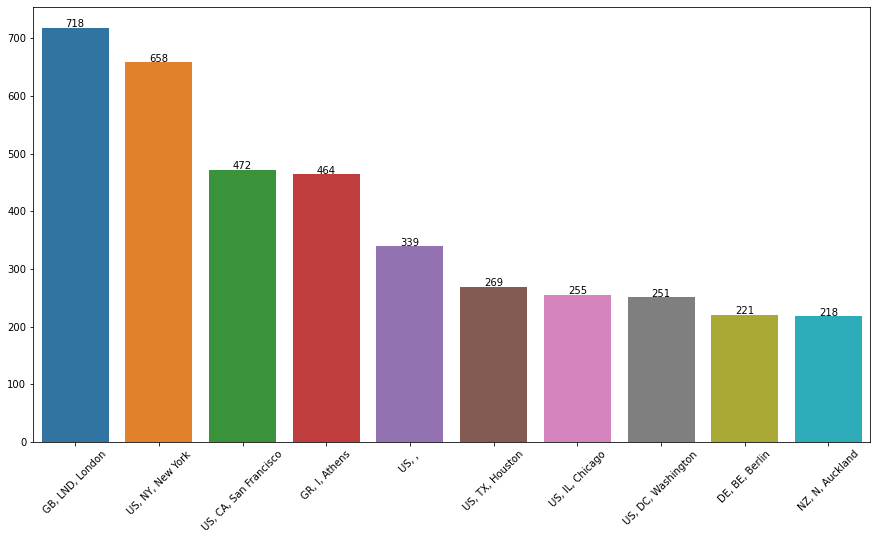

In [15]:
labels=df1['Job Location'].value_counts().index[:10]
values=df1['Job Location'].value_counts().values[:10]
plt.figure(figsize = (15, 8))

ax = sns.barplot(x=labels, y=values)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.9, values[i],ha="center")

The jobs are more located in London, US, New York, San Francisco, Canada and Anthens

### Visualizing the Target column

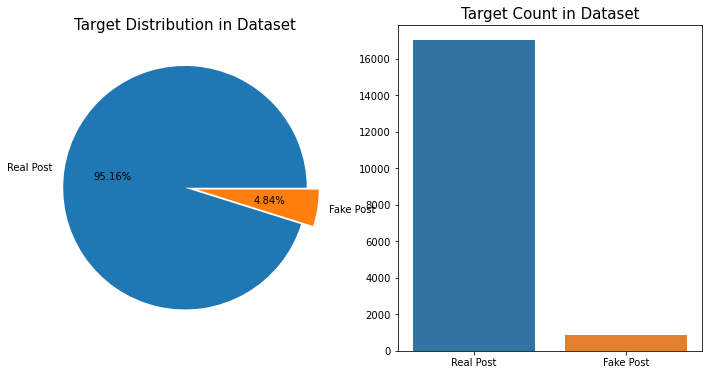

In [16]:
f, ax=plt.subplots(1,2, figsize=(12,6))

ax[0] = df1['Fraudulent'].value_counts().plot.pie(explode=[0, 0.1],autopct='%1.2f%%',ax=ax[0], labels=['Real Post', 'Fake Post'])

df2 = df1["Fraudulent"].value_counts()
sns.barplot(x = df2.index, y = df2, ax=ax[1])
ax[1].set_xticklabels(["Real Post", "Fake Post"])


ax[0].set_ylabel(' ')
ax[1].set_ylabel(' ')

ax[0].set_title('Target Distribution in Dataset', fontsize=15)
ax[1].set_title('Target Count in Dataset', fontsize=15)

plt.show()

The above visualizationshows that the dataset is highly imbalanced

### Visualizing the Experience and Type of Employment columns

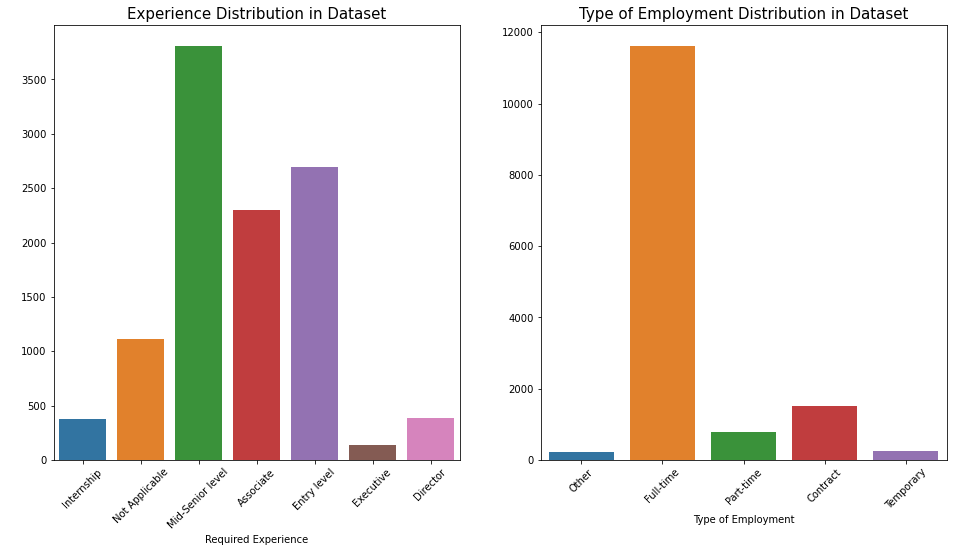

In [17]:
f, ax=plt.subplots(1,2, figsize=(16,8))
sns.countplot(x='Experience', data=df1, ax=ax[0])
ax[0].set_ylabel(' ')
ax[0].set_xlabel('Required Experience')
ax[0].set_title('Experience Distribution in Dataset', fontsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(),  rotation=45)


sns.countplot(x='Type_of_Employment', data=df1, ax=ax[1])
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Type of Employment')
ax[1].set_title('Type of Employment Distribution in Dataset', fontsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(),  rotation=45)

plt.show()

- It is observed that Full-time jobs are posted more comparatively to other type of employment.
- We can conclude that there are more jobs available that requires Mid-senior level Experience.

### Visualizing the Operations Column

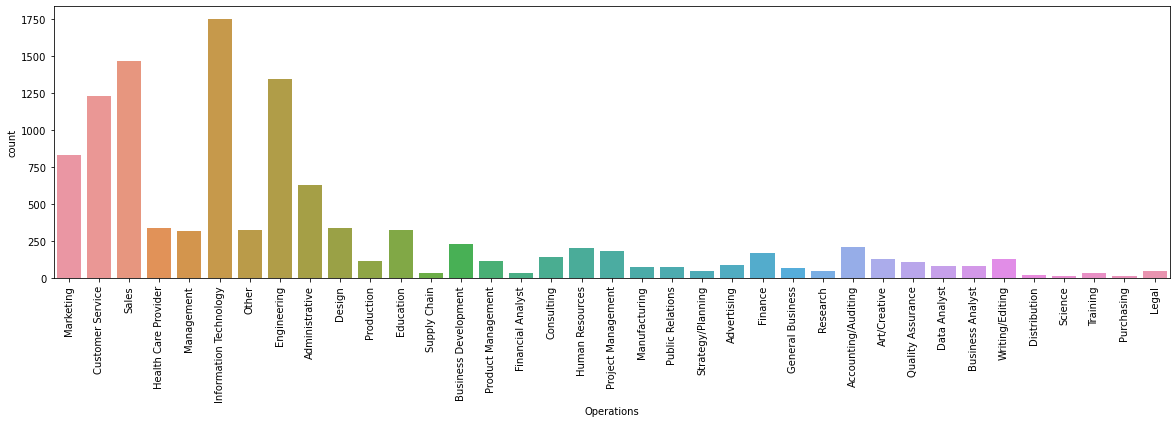

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(x='Operations',data=df1)
plt.xticks(rotation=90)
plt.show()

- Jobs in Sales,IT,Marketing,Engineering,Customer Service,Administrative are most sort after jobs.

### Visualizing the comnpany logo column

<AxesSubplot:xlabel='count', ylabel='Comnpany_Logo'>

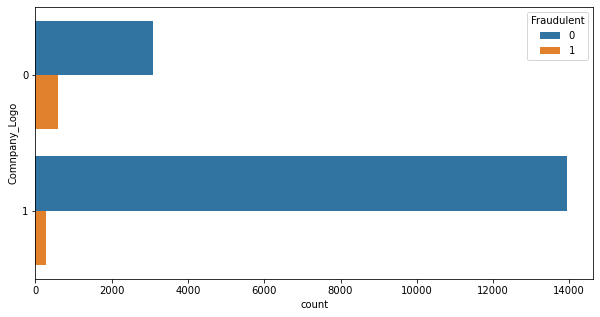

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(y='Comnpany_Logo',data=df1,hue='Fraudulent')

- As we expect, most of the fraudulent job postings do not have company logo.

### Visualizing the Qualification column

<AxesSubplot:xlabel='count', ylabel='Qualification'>

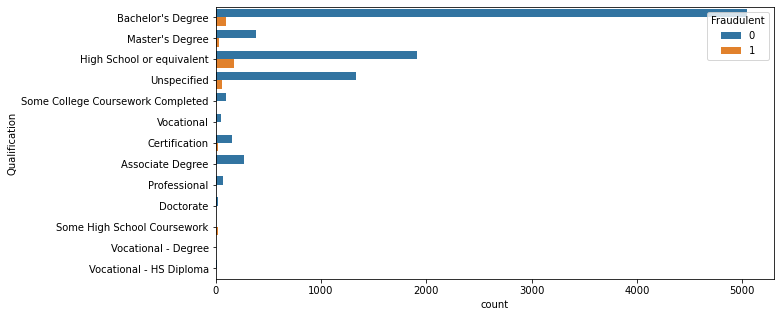

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(y='Qualification',data=df1,hue='Fraudulent')

- Fraudulent Job postings is high in jobs that reqiuires High School or equivalent qualifications.

### Wordcloud visualization of what the fraudulent companies write as their description

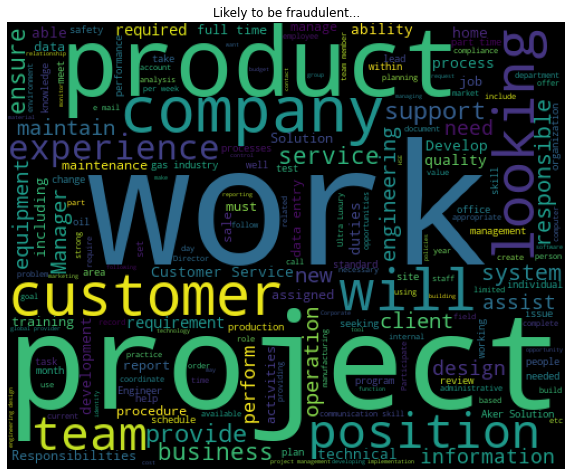

In [21]:
x =df1[df1['Fraudulent']==1]
# word cloud of the job description 
words = x['Job_Description'][~pd.isnull(x['Job_Description'])]
wordcloud = WordCloud(width=500,height=400).generate(''.join(words))

plt.figure(figsize=(10,12))
plt.axis('off')
plt.title('Likely to be fraudulent...')
plt.imshow(wordcloud)
plt.show()

### Removing spaces, punctuations, numbers, dashes etc from the Text

In [22]:
def regex(text):
    text = text.replace("  "," ")
    text= text.lower()
    text =re.sub(r"http\S+", "", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub('\w*\d\w*', '', text)
    return text

In [23]:
df['Text'] = df['Text'].apply(lambda x: regex(x))

In [24]:
df.head()

,Range_of_Salary,Telecomunication,Comnpany_Logo,Fraudulent,Text,Total_Text_Length
0,,0,1,0,marketing intern us ny new york marketing were...,2721
1,,0,1,0,customer service cloud video production nz a...,6226
2,,0,1,0,commissioning machinery assistant cma us ia we...,2667
3,,0,1,0,account executive washington dc us dc washing...,5556
4,,0,1,0,bill review manager us fl fort worth spotsour...,4059
